In [1]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

import scipy as sc
import missingno as msno

In [100]:
#input
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'

# output
MODEL_FILE_PATH = '../model.pkl'

In [126]:
train_data = pd.read_csv(TRAIN_DATASET_PATH)
test_data = pd.read_csv(TEST_DATASET_PATH)

In [127]:
train_data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [144]:
target_name = 'target'

base_feature_names = train_data.columns.drop([target_name]).tolist()
cat_feature_names = train_data.select_dtypes(include='object').columns.tolist()
num_feature_names = train_data.columns.drop([target_name] + cat_feature_names).tolist()

In [6]:
train_data.shape, test_data.shape

((200000, 202), (200000, 201))

In [7]:
train_data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [8]:
train_data.isna().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [9]:
test_data.isna().sum()

ID_code    0
var_0      0
var_1      0
var_2      0
var_3      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 201, dtype: int64

пропусков в в датафреймах нет

категориальный признак один - ID_code, его можно переделать в int 

In [10]:
train_data.dtypes

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object

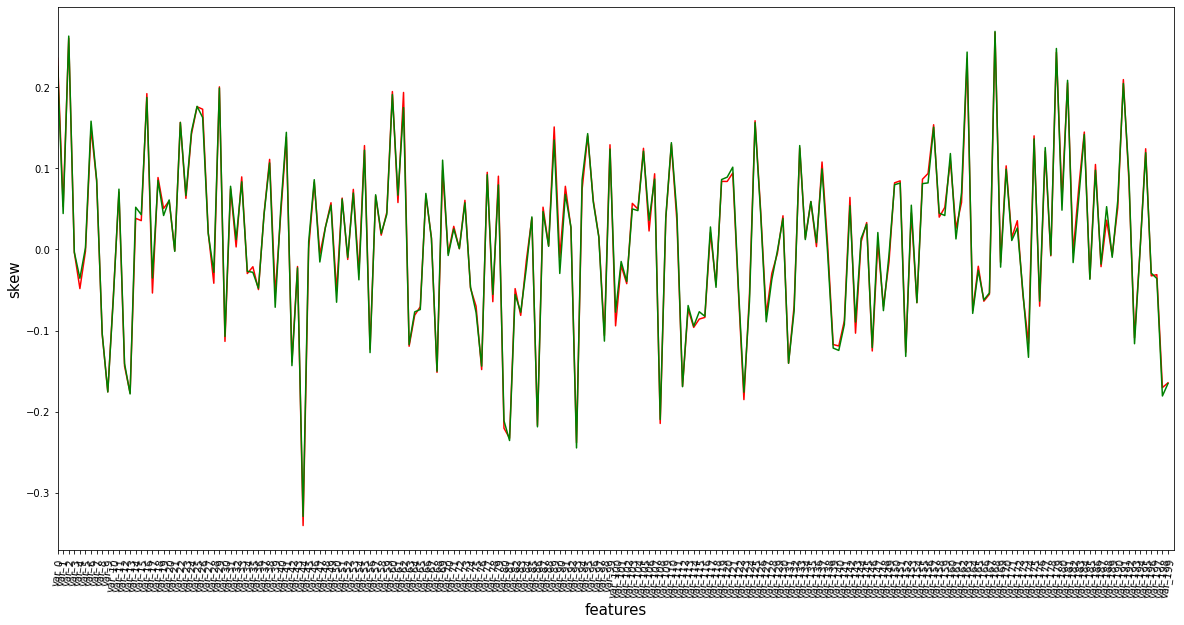

In [11]:
fig = plt.figure(figsize=(20,10))
train_stats, test_stats = train_data[base_feature_names].skew(), test_data.skew()
plt.plot(train_stats, color='red', label='train')
plt.plot(test_stats, color='green', label='test')

plt.xticks(range(train_stats.shape[0]), train_stats.index, rotation=80)
plt.xlabel('features', size=15)
plt.xlim(0, len(train_stats))
plt.ylabel('skew', size=15)
plt.show()

по графику выше можно сделать вывод что есть некотороее количество выбросов

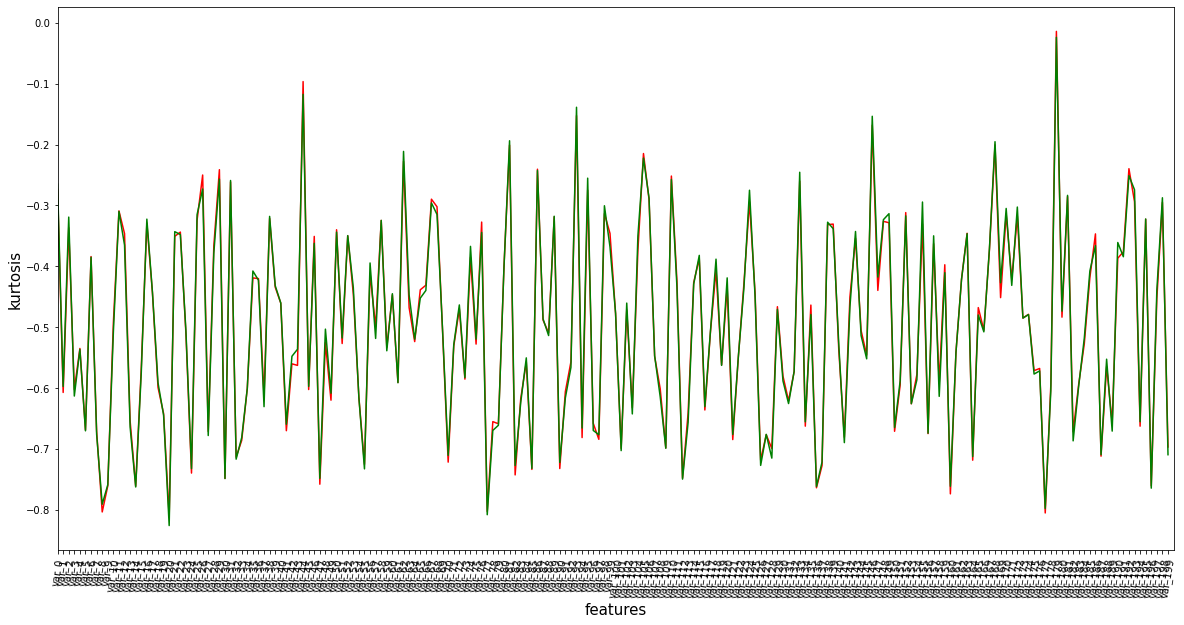

In [12]:
fig = plt.figure(figsize=(20,10))
train_stats, test_stats = train_data[base_feature_names].kurtosis(), test_data.kurtosis()
plt.plot(train_stats, color='red', label='train')
plt.plot(test_stats, color='green', label='test')

plt.xticks(range(train_stats.shape[0]), train_stats.index, rotation=80)
plt.xlabel('features', size=15)
plt.ylabel('kurtosis', size=15)
plt.xlim(0, len(train_stats))

plt.show()

## Целевая переменная

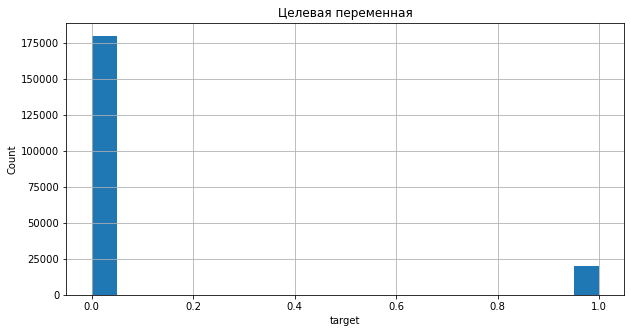

In [13]:
plt.figure(figsize = (10, 5))

train_data['target'].hist(bins=20)
plt.ylabel('Count')
plt.xlabel('target')

plt.title('Целевая переменная')
plt.show()

In [17]:
train_data['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [23]:
delta = train_data['target'].value_counts()[0] / train_data['target'].value_counts()[1]
print(f'выборка несбалансированна, разница в {delta.round(2)} раз')

выборка несбалансированна, разница в 8.95 раз


Следует учитывать дисбаланс классов при обучении модели, иначе модель будет плохо предсказывать класс со значением 1

Анализ фичей

In [103]:
features_for_analysis = ['var_0', 'var_1', 'var_2', 'var_5', 
                        'var_9', 'var_10', 'var_13', 'var_20', 
                        'var_26', 'var_40', 'var_55', 'var_80', 
                        'var_106', 'var_109', 'var_139', 'var_175', 
                        'var_184', 'var_196']

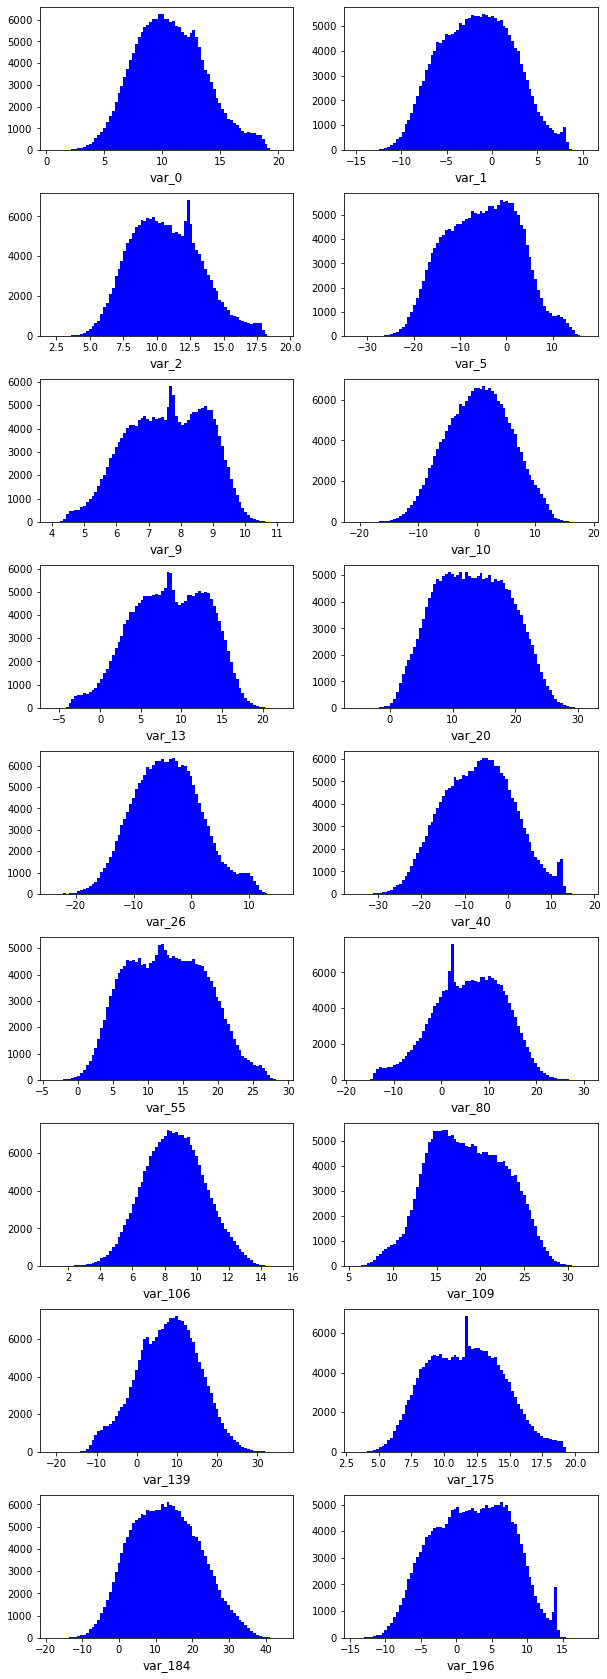

In [124]:
fig, axes = plt.subplots(9, 2, figsize=(10, 30))

for num, feature in enumerate(features_for_analysis):
    data = train_data[feature].copy()
    axes[num//2, num%2].hist(data, bins=80, color="blue")
    axes[num//2, num%2].set_xlabel(feature, fontsize=12)
    plt.subplots_adjust(hspace=0.3)

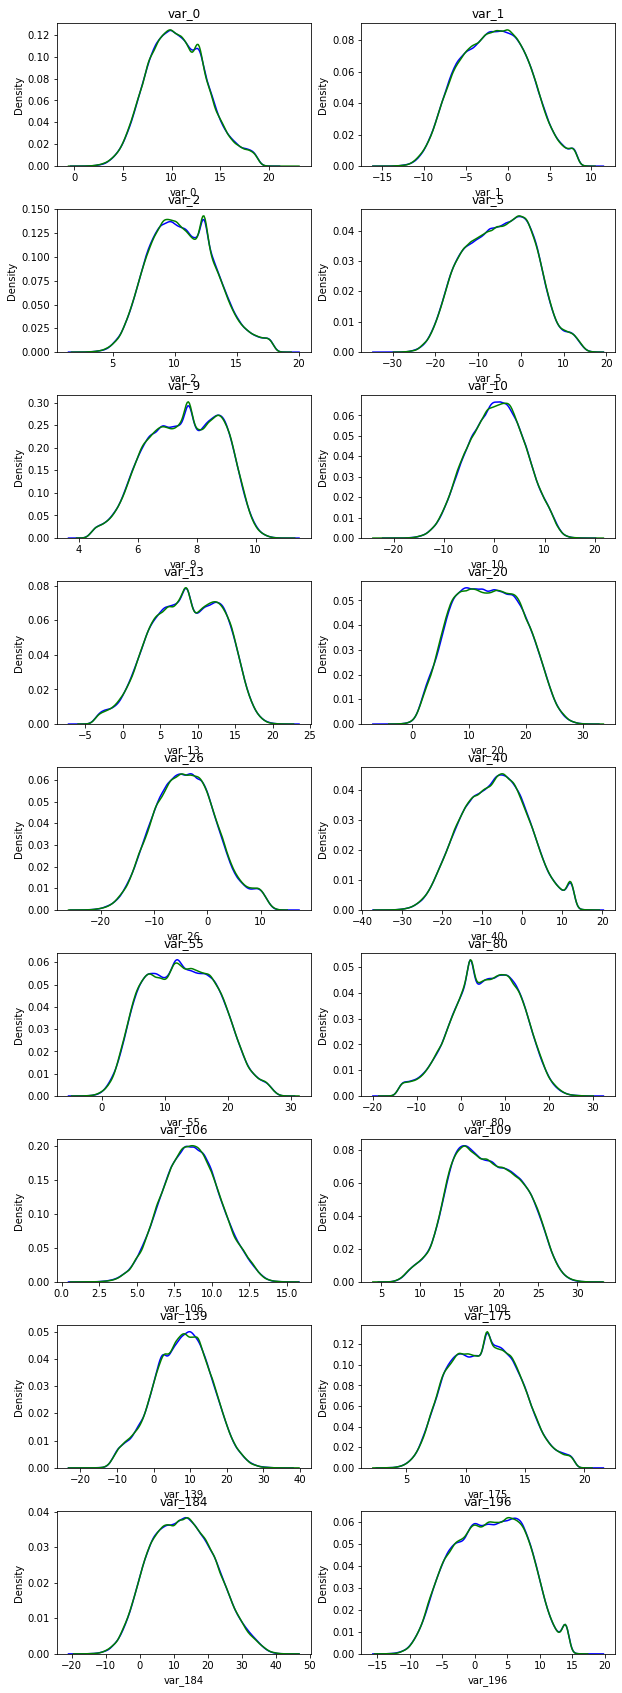

In [129]:
fig, axes = plt.subplots(9, 2, figsize=(10, 30))

for num, feature in enumerate(features_for_analysis):
    try:
        train, test = train_data[feature].copy(), test_data[feature].copy()
        sns.kdeplot(train, ax=axes[num//2, num%2], color="blue", label="train")
        sns.kdeplot(test, ax=axes[num//2, num%2], color="green", label="test")
        plt.subplots_adjust(hspace=0.3)
    except RuntimeError:
        pass
    except KeyError:
        train = train_data[feature].copy()
        sns.kdeplot(train, ax=axes[num//2, num%2], color="blue", label="train")
        plt.subplots_adjust(hspace=0.3)
#     axes[num//2, num%2].set_title(feature, fontsize=12)

Выводы: по графикам видно что есть некоторые различия между train и test в признаках var_196, var_0, var_1, var_2, var_10, var_55, var_139, var_175. 

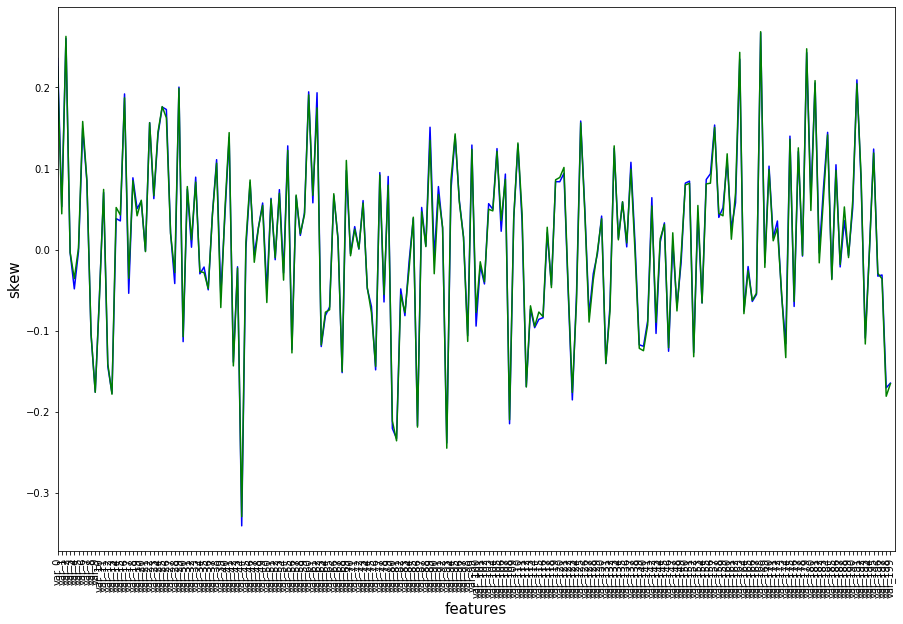

In [133]:
fig = plt.figure(figsize=(15, 10))
train_stats, test_stats = train_data[base_feature_names].skew(), test_data.skew()
plt.plot(train_stats, color="blue", label="train")
plt.plot(test_stats, color="green", label="test")
plt.xticks(range(train_stats.shape[0]), train_stats.index, rotation=90)
plt.xlabel("features", size=15)
plt.xlim(0, len(train_stats))
plt.ylabel("skew", size=15)
plt.show()

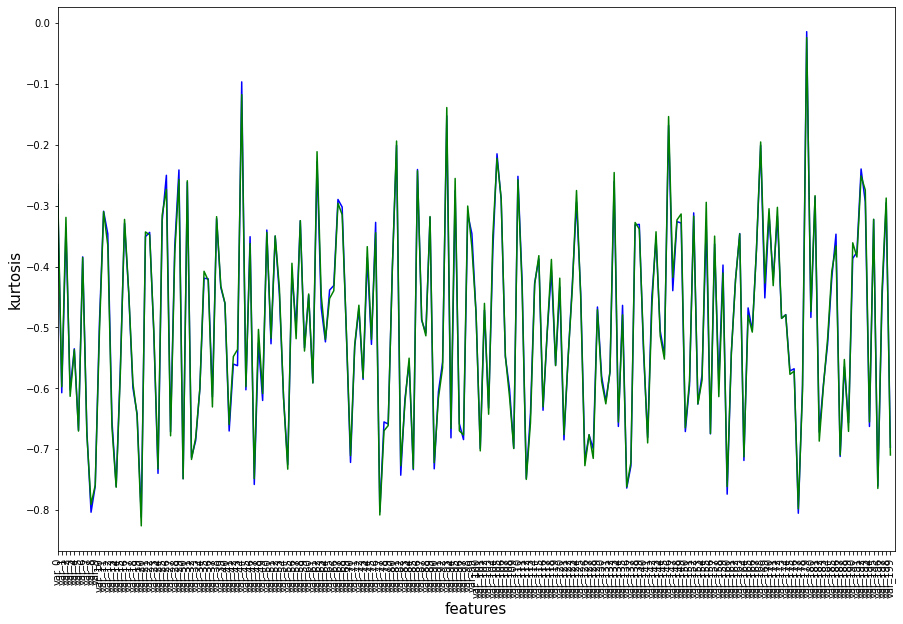

In [134]:
fig = plt.figure(figsize=(15, 10))
train_stats, test_stats = train_data[base_feature_names].kurtosis(), test_data.kurtosis()
plt.plot(train_stats, color="blue", label="train")
plt.plot(test_stats, color="green", label="test")
plt.xticks(range(train_stats.shape[0]), train_stats.index, rotation=90)
plt.xlabel("features", size=15)
plt.ylabel("kurtosis", size=15)
plt.xlim(0, len(train_stats))
plt.show()

есть некоторые сдвиги и по вертикали по горизонтали между распределениями значений признаков

## Корреляция между числовыми признаками

In [152]:
correlation = num_feature_names.corr()
corr_with_target = correlation["target"].sort_values(ascending = False)
corr_with_target

AttributeError: 'list' object has no attribute 'corr'

## top10 фичей с нелинейной взаимосвязью с целевой переменной

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [155]:
%%time
parameters = {"max_depth": 6, "n_estimators": 25, "random_state": 27, "n_jobs": 2}
forest = RandomForestClassifier(**parameters)
forest.fit(train_data[num_feature_names], train_data[target_name])

Wall time: 19.7 s


RandomForestClassifier(max_depth=6, n_estimators=25, n_jobs=2, random_state=27)

Text(0.5, 1.0, 'top10 important features')

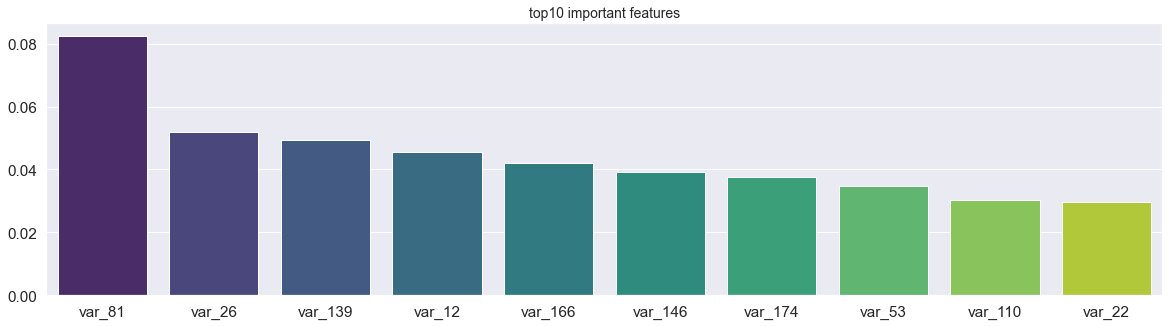

In [159]:
n_top = 10
importances = forest.feature_importances_
idx = np.argsort(importances)[::-1][0:n_top]
feature_names = train_data[num_feature_names].columns

plt.figure(figsize=(20, 5))
sns.barplot(x=feature_names[idx], y=importances[idx], palette="viridis")
plt.title("top10 important features", size=14)